In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [51]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [52]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [53]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [54]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [55]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [56]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [57]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1> Insight No.1 </h1>

<h1>What District Area has the most accidents?</h1>

In [58]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [79]:
accident_dis_area = accident['District Area'].value_counts().sort_index()

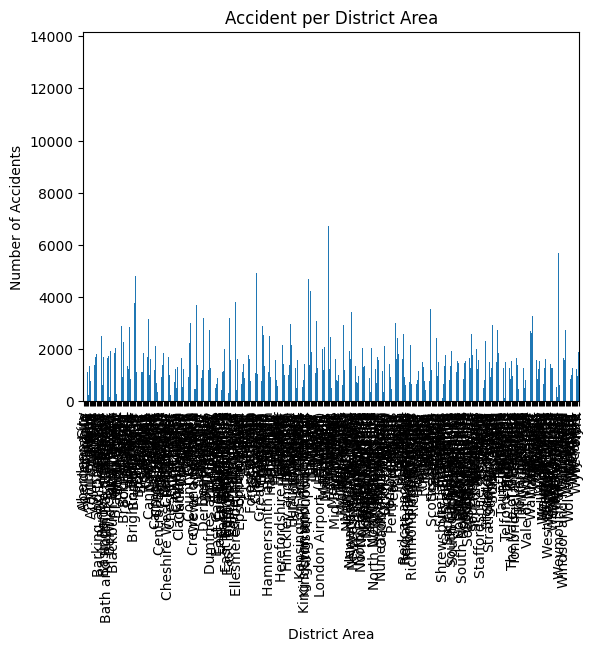

In [80]:
accident_dis_area.plot(kind='bar')
plt.title('Accident per District Area')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.show()

<h1> Birmingham has the most Accidents in United Kingdom from 2019-2022 with 13,491 Accidents</h1>

<h1> Insight No.2 </h1>

<h1> What Vehicle Type has the most accidents? </h1>

In [60]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [74]:
accident_veh_type = accident['Vehicle_Type'].value_counts().sort_index()

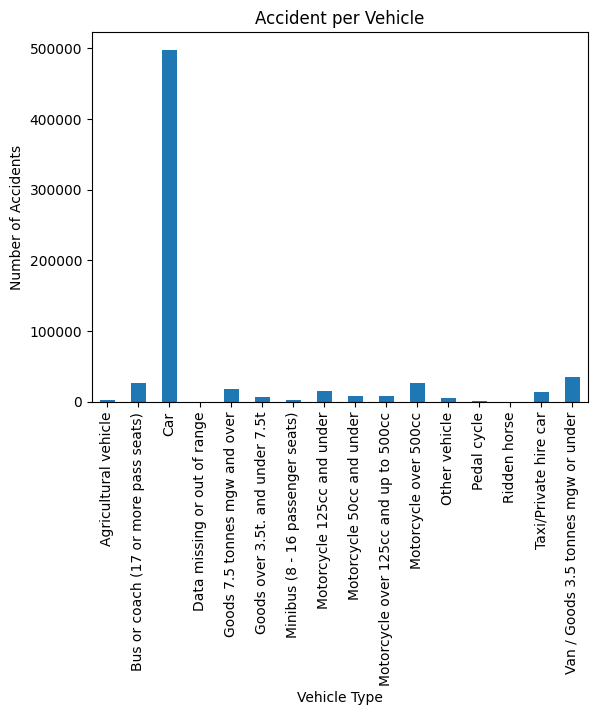

In [76]:
accident_veh_type.plot(kind='bar')
plt.title('Accident per Vehicle')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1> Car is the most involve vehicle type in accident with over 497,992 accidents and contributes 75% of all Accidents in United Kingdom</h1>

<h1> Insight No.3 </h1>

<h1> How does Wet Road Surface Condition contributes to Serious Accident Severity? </h1>

In [61]:
acc2 = accident[(accident['Road_Surface_Conditions'] == 'Wet') & (accident['Accident_Severity'] == 'Fatal')]

<h1> Insight No.4 </h1>

<h1> How does Area Types and Weather Conditions contributes to Number of Vehicles in Accident?</h1>

In [ ]:
accident[(['Area Types'] == 'Urban') & (accident['Weather_Conditions'] == 'fine no high winds') & (accident['Number_of_Vehicles'] == '2')]

<h1>Insight No.5 </h1>

<h1> What is the Relation of Road Type to the Accident Severity and Number of Casualties in Accident</h1>

<h1> UniVariate </h1>

<h1> Insight No.6 </h1>

In [81]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [82]:
accident[accident['Year'] == 2021]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


In [83]:
df_2021 = accident[accident['Year'] == 2021]

In [84]:
df_2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


In [85]:
df_2021['Road_Surface_Conditions'].value_counts().sum()

np.int64(66115)

In [86]:
df_2021['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     42641
Wet or damp             19869
Frost or ice             2543
Snow                      966
Flood over 3cm. deep       96
Name: count, dtype: int64

In [91]:
acc_rsc = accident['Road_Surface_Conditions'].value_counts().sort_index()

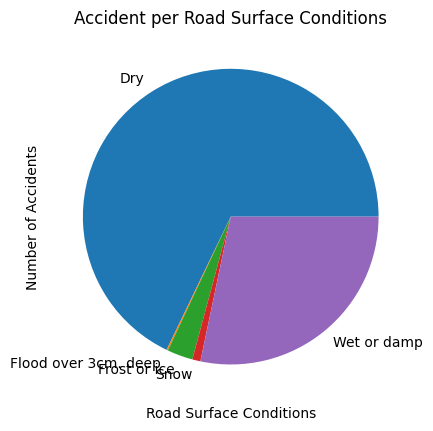

In [102]:
acc_rsc.plot(kind='pie')
plt.title('Accident per Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.show()

<h1>64% of 2021 Accidents happen in Dry Surface</h1>

<h1>78% of 2021 Accidents are Cars with Total of 51,745</h1>

<h1> Insight No.7 </h1>

In [93]:
accident[accident['Weather_Conditions'] == 'Fine no high winds']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
5,200701BS67159,Serious,NaT,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022.0,2.0,2.0,2.0
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN


In [95]:
acc_wc = accident['Weather_Conditions'].value_counts().sort_index()

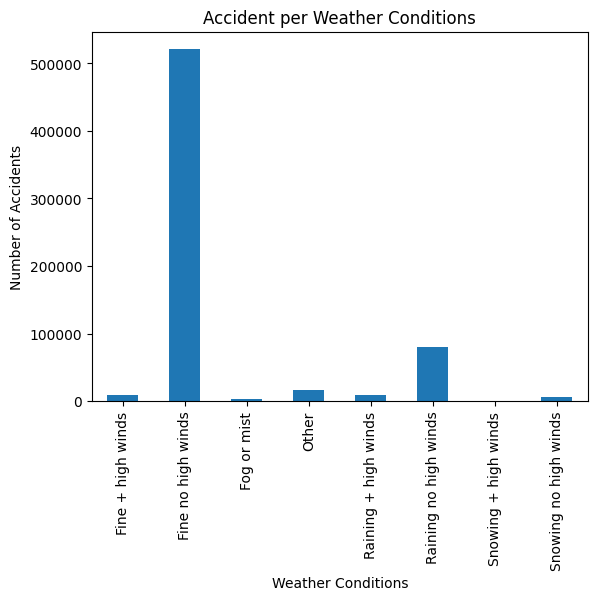

In [103]:
acc_wc.plot(kind='bar')
plt.title('Accident per Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

<h1> 79% of All Accidents Happen in Fine No High Winds Weather Condition with Total of 520885 Accidents. </h1>

<h1> Insight No.8 </h1>

In [97]:
 accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

In [99]:
acc_rt = accident['Road_Type'].value_counts().sort_index()

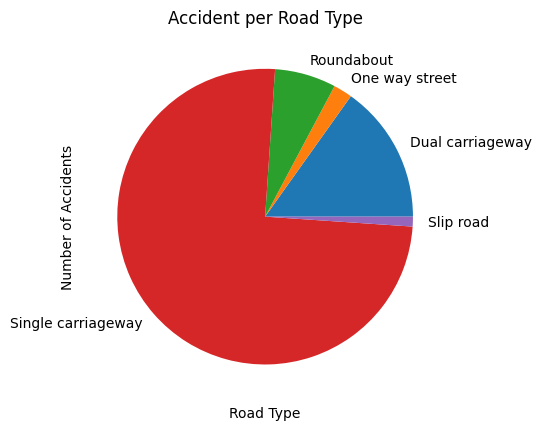

In [100]:
acc_rt.plot(kind='pie')
plt.title('Accident per Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()

In [98]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [104]:
acc_ur = accident['Urban_or_Rural_Area'].value_counts().sort_index()

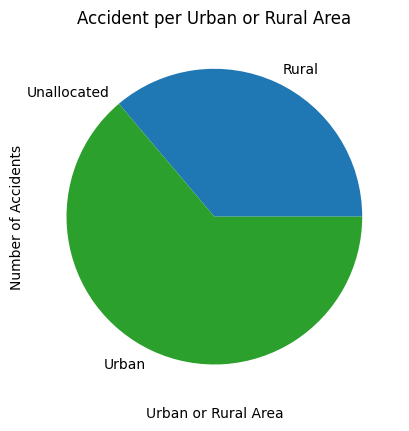

In [115]:
acc_ur.plot(kind='pie')
plt.title('Accident per Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Accidents')
plt.show()

<h1> 74% of all Accidents happen in Single Carriageway and 64% of all Accidents happen in Urban Area </h1>

<h1> Insight No.9 </h1>

<h1> Does accident increased from 2019 to 2020? </h1>

In [106]:
accident[accident['Year'] == 2019]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019.0,9.0,3.0,1.0
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182097,2.01E+12,Slight,2019-11-07,55.212275,Darkness - no lighting,Dumfries and Galloway,-3.413007,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019.0,11.0,7.0,3.0
182101,2.01E+12,Slight,2019-12-02,55.009139,Daylight,Dumfries and Galloway,-3.319379,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,2.0,0.0
182102,2.01E+12,Slight,2019-12-03,54.993061,Daylight,Dumfries and Galloway,-3.131122,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,3.0,1.0
182103,2.01E+12,Serious,2019-12-06,55.127391,Darkness - lights lit,Dumfries and Galloway,-3.439964,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2019.0,12.0,6.0,4.0


In [107]:
accident[accident['Year'] == 2020]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
182120,200801BS70001,Serious,2020-01-02,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,2.0,3.0
182121,200801BS70002,Slight,2020-01-06,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020.0,1.0,6.0,0.0
182122,200801BS70003,Serious,2020-01-12,51.509965,Daylight,Kensington and Chelsea,-0.197405,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,12.0,6.0
182123,200801BS70004,Slight,2020-01-05,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,5.0,6.0
182124,200801BS70005,Slight,2020-01-03,51.509712,Darkness - lights lit,Kensington and Chelsea,-0.192659,3,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352694,2.01E+12,Slight,2020-11-01,55.267100,Darkness - no lighting,Dumfries and Galloway,-2.959324,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,1.0,6.0
352695,2.01E+12,Slight,2020-11-02,54.985218,Daylight,Dumfries and Galloway,-3.278743,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020.0,11.0,2.0,0.0
352696,2.01E+12,Slight,2020-11-06,55.126057,Darkness - no lighting,Dumfries and Galloway,-3.344404,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,6.0,4.0
352697,2.01E+12,Serious,2020-11-04,55.243971,Darkness - no lighting,Dumfries and Galloway,-3.461163,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,4.0,2.0


In [108]:
acc_year = accident['Year'].value_counts().sort_index()

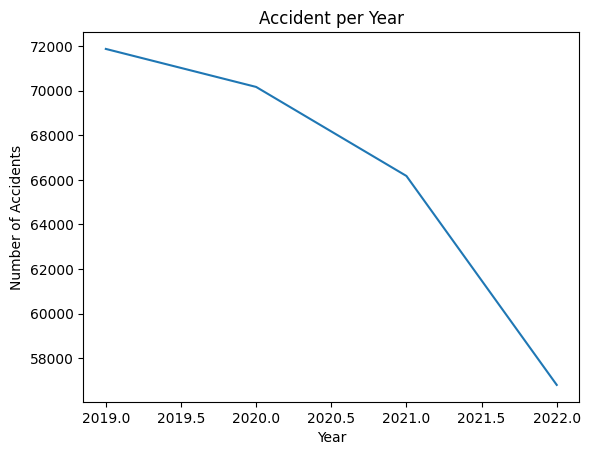

In [112]:
acc_year.plot(kind='line')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

<h1> The Accidents decrease from 2019 with total of 71,867 accidents to 2020 accidents with total of 70,163 accidents. The decrease of accidents is -2.37%<h1>

<h1> Insight No.10 </h1>

In [ ]:
acc1 = accident[(accident['Accident_Severity'] == 'Fatal') & (accident['Urban_or_Rural_Area'] == 'Rural')]

In [ ]:
acc1

<h1>There are 5,601 Fatal Accidents happened in Rural Area.</h1>

<h1>Insight No.11</h1>

<h1> What year has the Highest Accidents Recorded in United Kingdom?</h1>

In [ ]:
accident['Year'].value_counts()


In [37]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h1>2019 has the Highest Accidents recorded with over 71,867 accidents and most of the Accidents in United Kingdom happened in Dry Surface that contributes 68% to all Accidents.</h1>

<h1>Insight No.12</h1>

In [38]:
acc_conditions = accident[(accident['Light_Conditions'] == 'Daylight') & (accident['Road_Surface_Conditions'] == 'Dry')]

In [39]:
acc_conditions

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
5,200701BS67159,Serious,NaT,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
9,200701BS67543,Slight,NaT,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,NaN,NaN,NaN,NaN
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019.0,11.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660638,201091NL04333,Slight,2022-08-06,60.306795,Daylight,Shetland Islands,-1.242994,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022.0,8.0,6.0,5.0
660639,201091NL04383,Slight,2022-08-08,59.924538,Daylight,Shetland Islands,-1.290893,4,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2022.0,8.0,8.0,0.0
660645,201091NL05842,Serious,NaT,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car,NaN,NaN,NaN,NaN
660648,201091NL06327,Slight,2022-11-12,60.157151,Daylight,Shetland Islands,-1.146277,1,1,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022.0,11.0,12.0,5.0


In [40]:
accident_districtroad = accident[(acc_conditions['District Area'] == 'Birmingham') & (accident['Road_Type'] == 'Single carriageway')]

In [41]:
accident_districtroad

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
68521,200720D003802,Serious,2019-01-03,52.563201,Daylight,Birmingham,-1.822793,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,1.0,3.0,3.0
68524,200720D006001,Slight,2019-01-04,52.487709,Daylight,Birmingham,-1.840032,3,2,Dry,Single carriageway,Urban,Other,Car,2019.0,1.0,4.0,4.0
68538,200720D015003,Slight,NaT,52.494891,Daylight,Birmingham,-1.777995,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,NaN,NaN,NaN,NaN
68545,200720D017001,Slight,2019-01-10,52.491418,Daylight,Birmingham,-1.858724,1,1,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2019.0,1.0,10.0,3.0
68552,200720D018103,Slight,2019-01-08,52.473614,Daylight,Birmingham,-1.855247,1,2,Dry,Single carriageway,Urban,NaN,Motorcycle over 500cc,2019.0,1.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583514,201020W054720,Slight,NaT,52.502089,Daylight,Birmingham,-1.928371,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
583519,201020W055180,Slight,NaT,52.548094,Daylight,Birmingham,-1.895705,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
583525,201020W055950,Slight,NaT,52.505335,Daylight,Birmingham,-1.945014,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
583552,201020W503290,Slight,NaT,52.488673,Daylight,Birmingham,-1.898938,2,2,Dry,Single carriageway,Urban,NaN,Car,NaN,NaN,NaN,NaN


<h1> There are 356,085 accidents happened in Daylight with Dry Surface. </h1>

<h1> There are 4,952 accidents happened in Birmingham with Single Carriageway Road Type. </h1>

<h1>Insight No.13</h1>

In [42]:
accident_hotspots = accident['District Area'.value_counts().reset_index()]
accident_hotspots.columns = ['District Area', 'Accident Count']

AttributeError: 'str' object has no attribute 'value_counts'

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Accident Count', y='District Area', data=accident_hotspots.head(10), palette='Reds')
plt.xlabel('Number of Accidents')
plt.ylabel('District Area')
plt.title('Top 10 Most Affected Locations by Accidents')
plt.show()

NameError: name 'accident_hotspots' is not defined

<Figure size 1200x600 with 0 Axes>

<h1>Insight No.14</h1>

In [44]:
acc_conditions1 = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Road_Surface_Conditions'] == 'Dry')]

In [45]:
acc_conditions1

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,NaN,NaN,NaN,NaN
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
5,200701BS67159,Serious,NaT,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660609,201091NK02972,Serious,NaT,58.961359,Daylight,Orkney Islands,-2.928920,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660613,201091NK03455,Serious,NaT,58.982692,Daylight,Orkney Islands,-2.959245,1,1,Dry,One way street,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660619,201091NK04839,Serious,NaT,58.977273,Daylight,Orkney Islands,-2.963443,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660629,201091NL00686,Serious,2022-02-11,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car,2022.0,2.0,11.0,4.0


<h1> There are 61,638 accidents happened in Dry Surface with Serious Accident Severity</h1>

<h1>Insight No.15</h1>

<h1>How many accidents with Fine + high winds condition in Rural Area?</h1>

In [46]:
acc_conditions2 = accident[(accident['Weather_Conditions'] == 'Fine + high winds') & (accident['Urban_or_Rural_Area'] == 'Rural')]

In [47]:
acc_conditions2

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7159,200701KD50018,Serious,NaT,51.525255,Darkness - no lighting,Havering,0.231222,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,NaN,NaN,NaN,NaN
7425,200701KD62822,Slight,2019-05-12,51.512375,Daylight,Havering,0.184472,1,1,Wet or damp,Dual carriageway,Rural,Fine + high winds,Car,2019.0,5.0,12.0,6.0
12299,200701PY65398,Serious,2019-07-06,51.350693,Daylight,Bromley,0.129952,3,2,Dry,Single carriageway,Rural,Fine + high winds,Bus or coach (17 or more pass seats),2019.0,7.0,6.0,5.0
14273,200701RY10077,Slight,2019-03-05,51.445413,Daylight,Bexley,0.158247,1,2,Dry,Dual carriageway,Rural,Fine + high winds,Motorcycle over 500cc,2019.0,3.0,5.0,1.0
15845,200701TB00016,Serious,NaT,51.629002,Daylight,Harrow,-0.329520,2,2,Dry,Single carriageway,Rural,Fine + high winds,Car,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,2022-02-11,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car,2022.0,2.0,11.0,4.0
660637,201091NL03904,Slight,NaT,60.233118,Daylight,Shetland Islands,-1.234763,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car,NaN,NaN,NaN,NaN
660645,201091NL05842,Serious,NaT,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car,NaN,NaN,NaN,NaN
660647,201091NL06131,Slight,2022-11-03,60.195539,Daylight,Shetland Islands,-1.258363,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022.0,11.0,3.0,3.0


<h1>There are 3,993 accidents with Fine + high winds in Rural Area.</h1>

<h1>Insight No.16</h1>

<h1>How many accidents happen in Darkness -no lightning in Motorcycle? </h1>

In [48]:
acc_conditions3 = accident[(accident['Light_Conditions'] == 'Daylight') & (accident['Vehicle_Type'] == 'Car')]